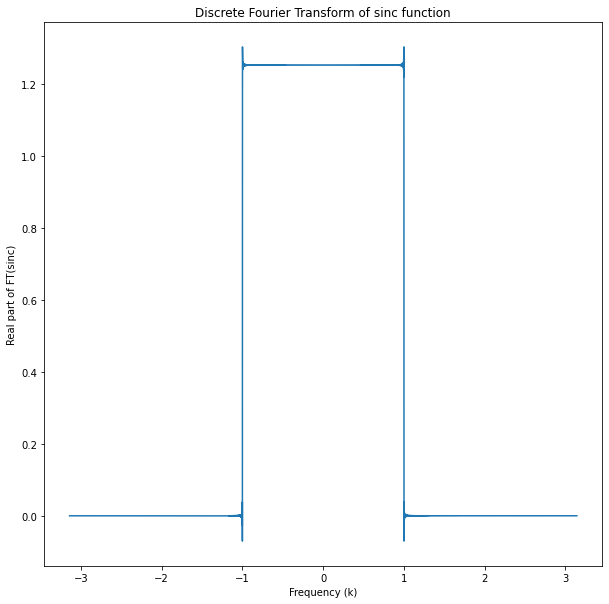

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def sinc(x):
    if x != 0:
        return np.sin(x) / x
    else:
        return 1

# Define parameters
x_limit = 5000
num_samples = 10001
delta_x = 2 * x_limit / (num_samples - 1)

# Generate x values
x_values = np.linspace(-x_limit, x_limit, num_samples)

# Evaluate sinc function at x values
sinc_values = np.vectorize(sinc, otypes=[float])(x_values)

# Generate frequencies
sampling_freq = 2 * np.pi / (num_samples * delta_x)
frequencies = sampling_freq * np.arange(-(num_samples - 1) / 2, (num_samples - 1) / 2 + 1)

# Compute Discrete Fourier Transform (DFT)
dft = np.fft.fft(sinc_values, norm="ortho")
dft = np.fft.fftshift(dft)

# Apply scaling factor
scaling_factor = delta_x * np.sqrt(num_samples / (2 * np.pi)) * np.exp(-1j * frequencies * np.min(x_values))
scaled_dft = scaling_factor * dft

# Plotting
fig1 = plt.figure(figsize=(10, 10))
plt.plot(frequencies, np.real(scaled_dft))
plt.xlabel('Frequency (k)')
plt.ylabel('Real part of FT(sinc)')
plt.title('Discrete Fourier Transform of sinc function')
plt.show()